# **Algoritmo di Grover**

È un algoritmo di ricerca quantistico, che permette di trovare una delle soluzioni che verificano un oracolo, con complessità

$$
O(\sqrt{n})
$$

Applicato su una QRAM, questo è un vero e proprio algoritmo di ricerca in un database disordinato.

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from BoredQiskit import FastQiskit as fq
from BoredQiskit import FastOracles as fo
import numpy as np

### **Operatore di Diffusione**

$$
Ref_{|+\rangle}^{\otimes n} = H^{\otimes n} Ref_{|0\rangle}^{\otimes n} H^{\otimes n}
$$

In [9]:
def grover_operator(n: int):
    '''
    builds the diffusion operator from the grover algorithm
    '''
    qx = QuantumRegister(n, 'x')
    qc = QuantumCircuit(qx)
    
    qc.h(qx)
    qc.x(qx)
    qc.h(qx[n-1])
    qc.mcx(qx[list(range(n-1))], qx[n-1])
    qc.h(qx[n-1])
    qc.x(qx)
    qc.h(qx)

    return qc.to_gate(label='DIFFUSION')

qc = QuantumCircuit(4)
qc = qc.compose(grover_operator(4))

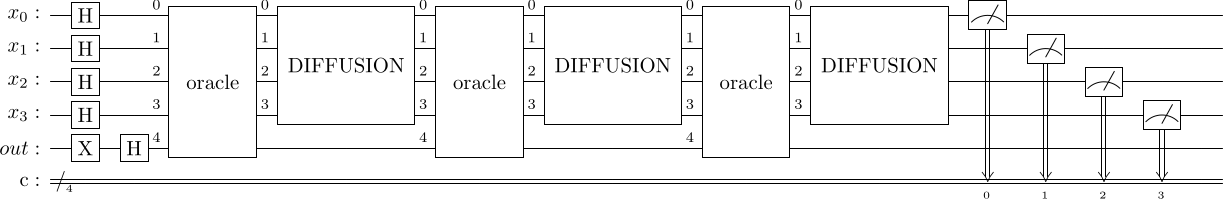

In [13]:
def grover_algorithm(U, n, M=1):
    N = 2**n
    epochs = int(np.floor(np.pi/4 * np.sqrt(N/M)))
    xr = QuantumRegister(n, 'x')
    out = QuantumRegister(1, 'out')
    c = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(xr, out, c)
    G = grover_operator(n)

    qc.h(xr)
    qc.x(out)
    qc.h(out)

    for i in range(epochs):
        qc = qc.compose(U, [*xr, out])
        qc = qc.compose(G, xr)

    qc.measure(xr, c)
    return qc

U = fo.general_boolean_oracle(4, ['0101'])
qc = grover_algorithm(U, 4)
qc.draw('latex')

In [12]:
fq.run(qc)

{'1010': 977,
 '0011': 5,
 '1110': 9,
 '1000': 3,
 '1011': 2,
 '1100': 2,
 '0100': 7,
 '1101': 3,
 '0000': 4,
 '0010': 2,
 '0111': 2,
 '1001': 3,
 '0110': 1,
 '0101': 1,
 '1111': 3}